<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/9.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20%E2%84%9612.%20%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Загрузите датасет

In [182]:
file_path = 'russian_news/news.csv'


data = pd.read_csv(file_path)

print(data.head())


     source                                           title  \
0  lenta.ru                                  Синий богатырь   
1  lenta.ru  Загитова согласилась вести «Ледниковый период»   
2  lenta.ru       Объяснена опасность однообразного питания   
3  lenta.ru                      «Предохраняться? А зачем?»   
4  lenta.ru     Ефремов систематически употреблял наркотики   

                                                text  \
0  В 1930-е годы Советский Союз охватила лихорадк...   
1  Олимпийская чемпионка по фигурному катанию  Ал...   
2  Российский врач-диетолог Римма Мойсенко объясн...   
3  В 2019 году телеканал «Ю» запустил адаптацию з...   
4  Актер  Михаил Ефремов  систематически употребл...   

            publication_date          rubric     subrubric tags  
0  2020-08-30T00:01:00+03:00       Экономика  Госэкономика  NaN  
1  2020-08-31T20:04:00+03:00           Спорт   Зимние виды  NaN  
2  2020-08-31T20:07:00+03:00        Из жизни           Еда  NaN  
3  2020-08-30T00:04:

In [183]:
data = data.drop('publication_date', axis=1)
data = data.drop('tags', axis=1)
data = data.dropna(subset=['rubric'])

Количество уникальных rubric: 15


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



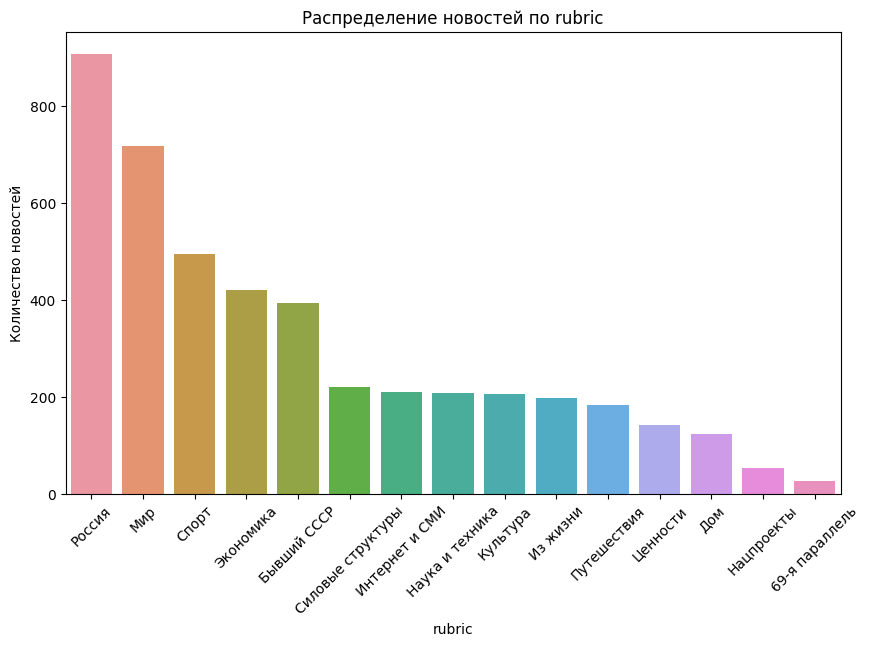

In [184]:
unique_rubrics = data['rubric'].nunique()
print("Количество уникальных rubric:", unique_rubrics)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rubric', order=data['rubric'].value_counts().index)
plt.title('Распределение новостей по rubric')
plt.xlabel('rubric')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.show()

In [74]:
data

,source,title,text,rubric,subrubric
0,lenta.ru,Синий богатырь,В 1930-е годы Советский Союз охватила лихорадк...,Экономика,Госэкономика
1,lenta.ru,Загитова согласилась вести «Ледниковый период»,Олимпийская чемпионка по фигурному катанию Ал...,Спорт,Зимние виды
2,lenta.ru,Объяснена опасность однообразного питания,Российский врач-диетолог Римма Мойсенко объясн...,Из жизни,Еда
3,lenta.ru,«Предохраняться? А зачем?»,В 2019 году телеканал «Ю» запустил адаптацию з...,Интернет и СМИ,ТВ и радио
4,lenta.ru,Ефремов систематически употреблял наркотики,Актер Михаил Ефремов систематически употребл...,Культура,Кино
...,...,...,...,...,...
4505,lenta.ru,Болгария начала получать газ из «Турецкого пот...,C 1 января Болгария начала получать российский...,Экономика,Госэкономика
4506,lenta.ru,В России изменили правила содержания животных,В России вступили в силу новые правила содержа...,Россия,Общество
4507,lenta.ru,Лазарев объяснил свой проигрыш на «Евровидении»,Российский певец Сергей Лазарев объяснил сво...,Культура,Музыка
4508,lenta.ru,Трамп заявил о нежелании воевать с Ираном,Президент США Дональд Трамп заявил о нежелан...,Мир,Политика


In [185]:
# данных всего 4503 текста. количество рубрик 15. количество подрубрик 77. Пожалуй, угадаем хотя бы рубрику
data = data.drop('subrubric', axis=1)

## Разделите данные на обучающую и валидационную выборки

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X = data['text']
y = data['rubric']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report


In [157]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

predictions = model.predict(X_valid)

accuracy = accuracy_score(y_valid, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_valid, predictions)
print("Classification Report:")
print(report)

Accuracy: 0.64
Classification Report:
                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         6
      Бывший СССР       0.87      0.69      0.77        90
              Дом       0.00      0.00      0.00        28
         Из жизни       0.87      0.38      0.53        34
   Интернет и СМИ       0.64      0.18      0.28        39
         Культура       0.75      0.14      0.24        42
              Мир       0.56      0.77      0.65       140
  Наука и техника       1.00      0.34      0.51        35
       Нацпроекты       0.00      0.00      0.00         5
      Путешествия       1.00      0.13      0.23        39
           Россия       0.47      0.89      0.62       186
Силовые структуры       0.83      0.49      0.62        49
            Спорт       1.00      0.92      0.96        97
         Ценности       0.95      0.68      0.79        28
        Экономика       0.71      0.81      0.76        83

         accurac

C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [88]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
# Увеличение выборки с использованием библиотеки imbalanced-learn 
from imblearn.over_sampling import RandomOverSampler
#библиотека imbalanced-learn используется для увеличения выборки с помощью RandomOverSampler. 
# Этот метод случайным образом выбирает примеры из класса-меньшинства и дублирует их, пока не достигнется баланс.

[ссылка на библиотеку: RandomOverSampler ](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [155]:
model_imb = make_imb_pipeline(CountVectorizer(), RandomOverSampler(), MultinomialNB())


model_imb.fit(X_train, y_train)


predictions = model_imb.predict(X_valid)


accuracy = accuracy_score(y_valid, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_valid, predictions)
print("Classification Report:")
print(report)

Accuracy: 0.74
Classification Report:
                   precision    recall  f1-score   support

   69-я параллель       1.00      0.17      0.29         6
      Бывший СССР       0.81      0.78      0.80        90
              Дом       0.80      0.43      0.56        28
         Из жизни       0.67      0.65      0.66        34
   Интернет и СМИ       0.50      0.56      0.53        39
         Культура       0.66      0.55      0.60        42
              Мир       0.71      0.71      0.71       140
  Наука и техника       0.86      0.71      0.78        35
       Нацпроекты       1.00      1.00      1.00         5
      Путешествия       0.64      0.72      0.67        39
           Россия       0.70      0.69      0.70       186
Силовые структуры       0.56      0.80      0.66        49
            Спорт       1.00      0.95      0.97        97
         Ценности       0.92      0.79      0.85        28
        Экономика       0.74      0.88      0.80        83

         accurac

## Вывод матрицы ошибок:

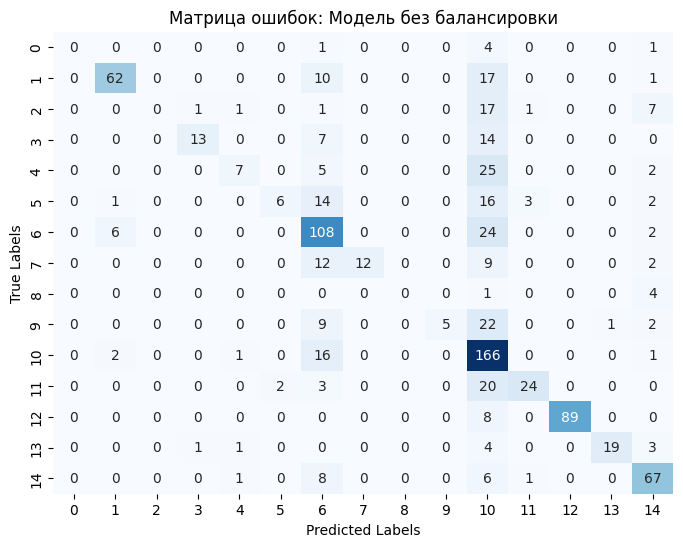

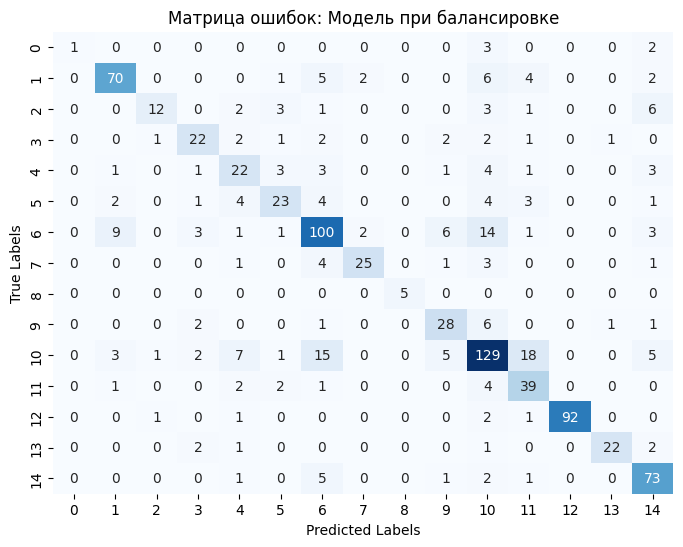

In [158]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions_imb = model_imb.predict(X_valid)

predictions = model.predict(X_valid)

# Функция для построения матрицы ошибок и её визуализации
def plot_confusion_matrix(predictions, title):
    conf_matrix = confusion_matrix(y_valid, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Матрица ошибок: {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


plot_confusion_matrix(predictions, 'Модель без балансировки')


plot_confusion_matrix(predictions_imb, 'Модель при балансировке')

## Оценка точности:

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def Accuracy_table(y_valid, predictions, predictions_imb):
    # Вычисление метрик для каждой модели
    accuracy_imb = accuracy_score(y_valid, predictions_imb)
    precision_imb = precision_score(y_valid, predictions_imb, average='weighted')
    recall_imb = recall_score(y_valid, predictions_imb, average='weighted')
    f1_imb = f1_score(y_valid, predictions_imb, average='weighted')

    accuracy_model = accuracy_score(y_valid, predictions)
    precision_model = precision_score(y_valid, predictions, average='weighted')
    recall_model = recall_score(y_valid, predictions, average='weighted')
    f1_model = f1_score(y_valid, predictions, average='weighted')

    # Создание DataFrame для данных
    data = {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Model_imb': [accuracy_imb, precision_imb, recall_imb, f1_imb],
        'Model': [accuracy_model, precision_model, recall_model, f1_model]
    }

    df = pd.DataFrame(data)

    # Вывод таблицы
    print(df)

In [163]:
Accuracy_table(y_valid, predictions, predictions_imb)

     Metrics  Model_imb     Model
0   Accuracy   0.735849  0.641509
1  Precision   0.746934  0.695997
2     Recall   0.735849  0.641509
3   F1-Score   0.734965  0.608418


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

In [132]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Создание конвейера: векторизация текста и обучение SVM
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1.0, random_state=42))

# Обучение модели на обучающих данных
svm_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [138]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

oversample = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train.values.reshape(-1, 1), y_train)


svm_model_im = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1.0, random_state=42))

svm_model_im.fit(X_train_resampled.squeeze(), y_train_resampled)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', random_state=42))])

## Вывод матрицы ошибок:

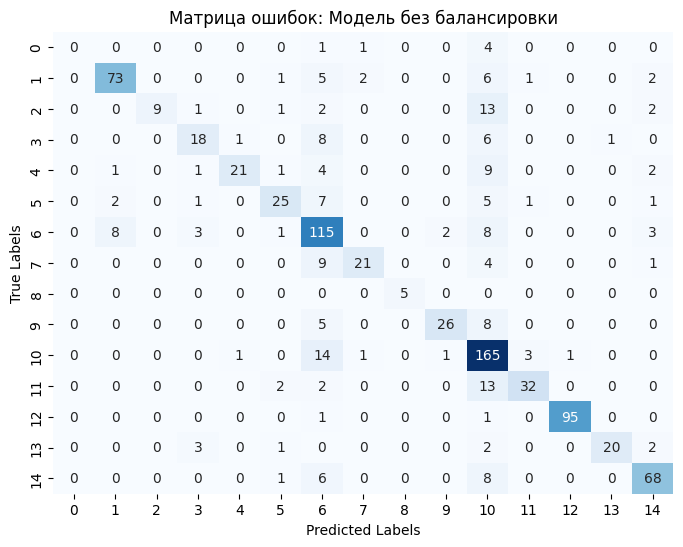

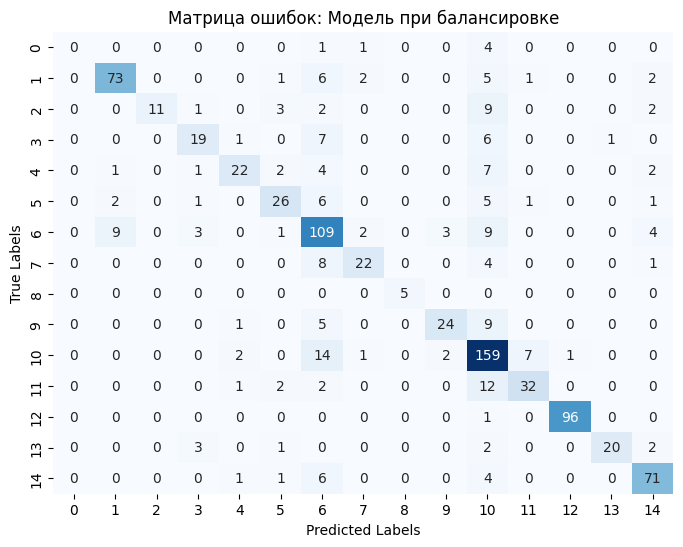

In [147]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Предсказания для модели model_imb
predictions_svm = svm_model.predict(X_valid)

predictions_svm_im = svm_model_im.predict(X_valid)

# Вывод матрицы ошибок для model
plot_confusion_matrix(predictions_svm, 'Модель без балансировки')

plot_confusion_matrix(predictions_svm_im, 'Модель при балансировке')


## Оценка точности:

In [165]:
Accuracy_table(y_valid, predictions_svm, predictions_svm_im)

     Metrics  Model_imb     Model
0   Accuracy   0.764706  0.769145
1  Precision   0.775378  0.790363
2     Recall   0.764706  0.769145
3   F1-Score   0.759622  0.763228


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Создание конвейера: векторизация текста и обучение Decision Tree Classifier
tree_model = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))

# Обучение модели на обучающих данных
tree_model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [144]:
tree_model_imb = make_imb_pipeline(TfidfVectorizer(), RandomOverSampler(), DecisionTreeClassifier(random_state=42))

tree_model_imb.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomoversampler', RandomOverSampler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Вывод матрицы ошибок:

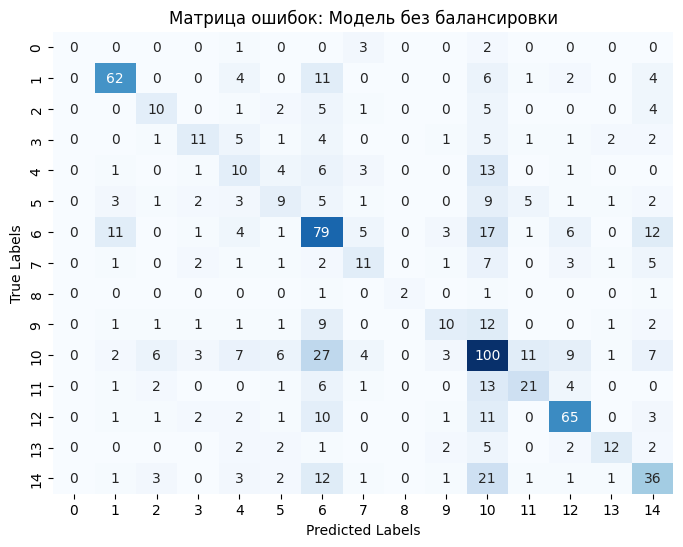

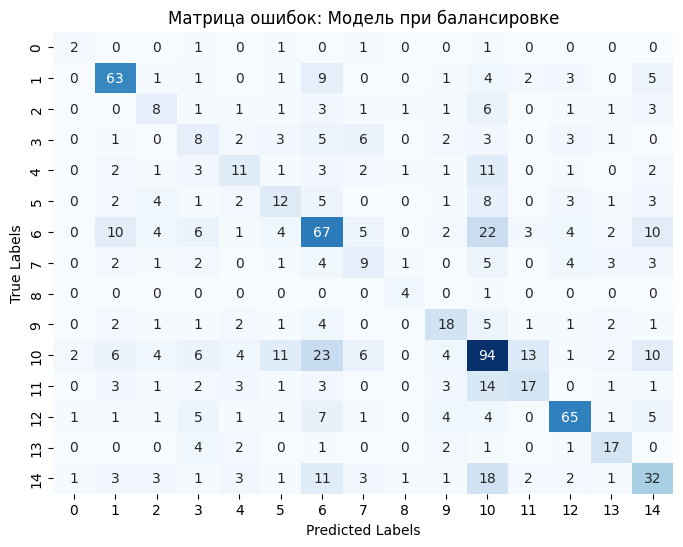

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Предсказания для модели model_imb
predictions_tree = tree_model.predict(X_valid)
predictions_tree_imb  = tree_model_imb.predict(X_valid)

# Вывод матрицы ошибок для model
plot_confusion_matrix(predictions_tree, 'Модель без балансировки')
plot_confusion_matrix(predictions_tree_imb, 'Модель при балансировке')


## Оценка точности:

In [166]:
Accuracy_table(y_valid, predictions_tree,predictions_tree_imb)

     Metrics  Model_imb     Model
0   Accuracy   0.473918  0.486127
1  Precision   0.475052  0.489546
2     Recall   0.473918  0.486127
3   F1-Score   0.473230  0.481917


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Создание конвейера: векторизация текста и обучение Random Forest Classifier
forest_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))

# Обучение модели на обучающих данных
forest_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [168]:
forest_model_imb = make_imb_pipeline(TfidfVectorizer(), RandomOverSampler(), RandomForestClassifier(random_state=42))

forest_model_imb.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomoversampler', RandomOverSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Вывод матрицы ошибок:

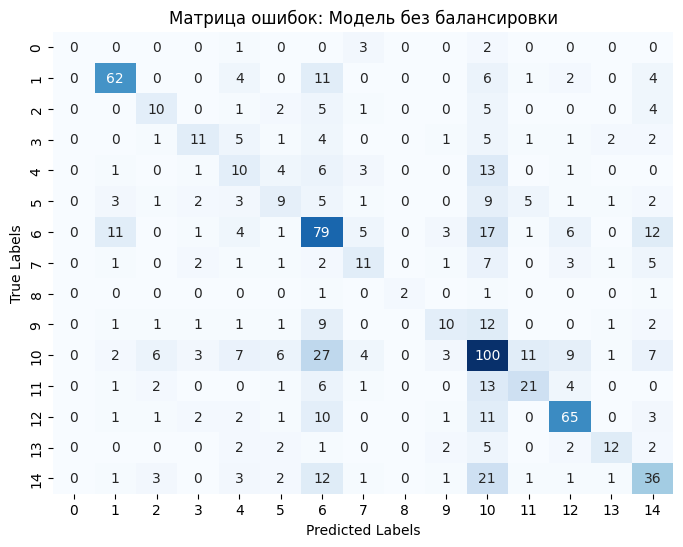

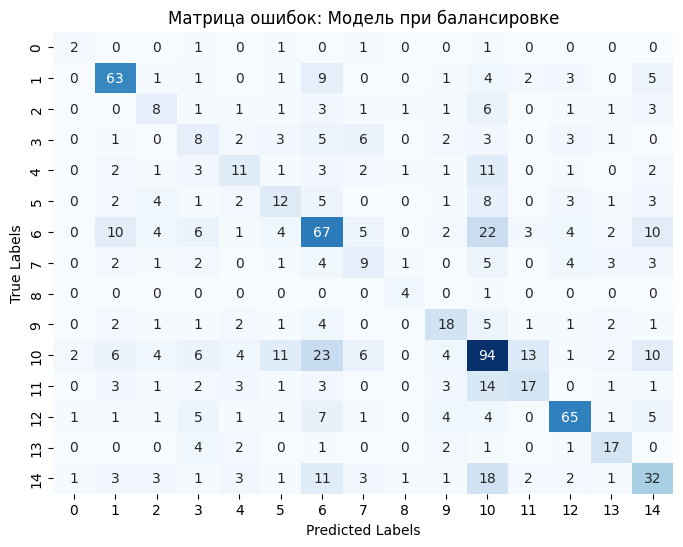

In [169]:
# Предсказания для модели model_imb
predictions_forest = tree_model.predict(X_valid)
predictions_forest_imb  = tree_model_imb.predict(X_valid)

# Вывод матрицы ошибок для model
plot_confusion_matrix(predictions_tree, 'Модель без балансировки')
plot_confusion_matrix(predictions_tree_imb, 'Модель при балансировке')

## Оценка точности:

In [170]:
Accuracy_table(y_valid, predictions_forest,predictions_forest_imb)

     Metrics  Model_imb     Model
0   Accuracy   0.473918  0.486127
1  Precision   0.475052  0.489546
2     Recall   0.473918  0.486127
3   F1-Score   0.473230  0.481917


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [173]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

In [190]:
from sklearn.preprocessing import LabelEncoder

# Создание объекта LabelEncoder
label_encoder = LabelEncoder()

# Преобразование текстовых меток классов в числовые значения
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

In [195]:
# Создание пустого словаря для результатов
results = {}

# Модели, которые будут использоваться
models = {
    "CatBoost": make_pipeline(TfidfVectorizer(), CatBoostClassifier(random_state=42)),
    "LightGBM": make_pipeline(TfidfVectorizer(), LGBMClassifier(random_state=42)),
    "XGBoost": make_pipeline(TfidfVectorizer(), XGBClassifier(random_state=42)),
    "AdaBoost": make_pipeline(TfidfVectorizer(), AdaBoostClassifier(random_state=42))
}

# Обучение и оценка каждой модели
for name, model in models.items():
    start_time = time.time()  # Начало отсчета времени обучения
    model.fit(X_train, y_train_encoded)
    train_time = time.time() - start_time  # Время обучения

    start_time = time.time()  # Начало отсчета времени предсказания
    y_pred = model.predict(X_valid)
    predict_time = time.time() - start_time  # Время предсказания

    accuracy = accuracy_score(y_valid_encoded, y_pred)
    confusion = confusion_matrix(y_valid_encoded, y_pred)
    precision = precision_score(y_valid_encoded, y_pred, average='weighted')
    recall = recall_score(y_valid_encoded, y_pred, average='weighted')
    f1 = f1_score(y_valid_encoded, y_pred, average='weighted')

    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Training Time": train_time,
        "Prediction Time": predict_time
    }

# Вывод результатов
for name, metrics in results.items():
    print(f"Модель: {name}")
    print(f"Точность: {metrics['Accuracy']}")
    print(f"Матрица ошибок: \n{metrics['Confusion Matrix']}")
    print(f"Точность (Precision): {metrics['Precision']}")
    print(f"Полнота (Recall): {metrics['Recall']}")
    print(f"F1-мера: {metrics['F1-score']}")
    print(f"Время обучения: {metrics['Training Time']} секунд")
    print(f"Время предсказания: {metrics['Prediction Time']} секунд")
    print("---------------------")


Learning rate set to 0.084471
0:	learn: 2.6140344	total: 1.74s	remaining: 29m 1s
1:	learn: 2.5280502	total: 3.55s	remaining: 29m 32s
2:	learn: 2.4560963	total: 5.33s	remaining: 29m 33s
3:	learn: 2.4023792	total: 7.14s	remaining: 29m 38s
4:	learn: 2.3452398	total: 8.94s	remaining: 29m 39s
5:	learn: 2.3045479	total: 10.8s	remaining: 29m 42s
6:	learn: 2.2683370	total: 12.5s	remaining: 29m 39s
7:	learn: 2.2420702	total: 14.3s	remaining: 29m 35s
8:	learn: 2.2075560	total: 16.1s	remaining: 29m 33s
9:	learn: 2.1832832	total: 17.9s	remaining: 29m 35s
10:	learn: 2.1540431	total: 19.7s	remaining: 29m 32s
11:	learn: 2.1258904	total: 21.5s	remaining: 29m 31s
12:	learn: 2.1013023	total: 23.3s	remaining: 29m 30s
13:	learn: 2.0845206	total: 25.1s	remaining: 29m 28s
14:	learn: 2.0623166	total: 26.9s	remaining: 29m 26s
15:	learn: 2.0455577	total: 28.7s	remaining: 29m 27s
16:	learn: 2.0292218	total: 30.5s	remaining: 29m 26s
17:	learn: 2.0075890	total: 32.3s	remaining: 29m 23s
18:	learn: 1.9938395	total:

C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Модель: CatBoost
Точность: 0.7258601553829079
Матрица ошибок: 
[[  3   0   0   0   0   0   0   1   0   0   2   0   0   0   0]
 [  0  74   0   0   0   0   6   2   0   1   6   0   1   0   0]
 [  0   0  13   1   1   2   2   0   0   0   7   0   0   0   2]
 [  0   0   0  16   1   0   8   1   0   1   7   0   0   0   0]
 [  0   1   0   1  15   2   4   0   1   0  12   0   0   0   3]
 [  0   2   1   1   0  22   5   0   0   0   9   1   0   0   1]
 [  0   8   0   2   0   0 102   0   0   3  24   0   0   0   1]
 [  0   1   0   0   1   0   9  12   0   0   8   0   2   0   2]
 [  0   0   0   0   0   0   1   0   3   0   0   0   0   0   1]
 [  0   0   0   0   0   0   6   0   0  26   7   0   0   0   0]
 [  0   1   0   0   2   0  10   2   0   1 163   3   1   1   2]
 [  0   0   0   0   0   2   0   1   0   0  13  33   0   0   0]
 [  0   1   0   0   0   0   3   0   0   0   1   0  92   0   0]
 [  0   0   0   1   1   1   0   0   0   0   3   0   1  20   1]
 [  0   0   0   0   1   1  13   0   0   0   8   0   0  

C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Подведите общие итоги

In [196]:
import plotly.express as px

model_names = list(results.keys())
training_times = [result["Training Time"] for result in results.values()]

fig_training = px.bar(x=model_names, y=training_times, labels={"x": "Модель", "y": "Время обучения (сек)"},
                      title="Время обучения для каждой модели")
fig_training.update_traces(marker=dict(color=['red' if t == min(training_times) else 'blue' for t in training_times]))

fig_training.show()

prediction_times = [result["Prediction Time"] for result in results.values()]

fig_prediction = px.bar(x=model_names, y=prediction_times, labels={"x": "Модель", "y": "Время предсказания (сек)"},
                        title="Время предсказания для каждой модели")
fig_prediction.update_traces(marker=dict(color=['red' if t == min(prediction_times) else 'blue' for t in prediction_times]))

fig_prediction.show()

In [197]:
import plotly.express as px

precision_values = [result["Precision"] for result in results.values()] #  tp / (tp + fp)
recall_values = [result["Recall"] for result in results.values()] #  tp / (tp + fn)
f1_values = [result["F1-score"] for result in results.values()] # 2 * (precision * recall) / (precision + recall)


best_precision_idx = precision_values.index(max(precision_values))
best_recall_idx = recall_values.index(max(recall_values))
best_f1_idx = f1_values.index(max(f1_values))

# Точность для каждой модели
fig_precision = px.bar(x=model_names, y=precision_values, labels={"x": "Модель", "y": "Precision"},
             title="Точность для каждой модели")
fig_precision.update_traces(marker=dict(color=[('red' if i == best_precision_idx else 'blue') for i in range(len(model_names))]))

# Полнота для каждой модели
fig_recall = px.bar(x=model_names, y=recall_values, labels={"x": "Модель", "y": "Recall"},
             title="Полнота для каждой модели")
fig_recall.update_traces(marker=dict(color=[('red' if i == best_recall_idx else 'blue') for i in range(len(model_names))]))

# F1-score для каждой модели
fig_f1 = px.bar(x=model_names, y=f1_values, labels={"x": "Модель", "y": "F1-score"},
             title="F1-score для каждой модели")
fig_f1.update_traces(marker=dict(color=[('red' if i == best_f1_idx else 'blue') for i in range(len(model_names))]))

fig_precision.show()
fig_recall.show()
fig_f1.show()

# Да здравствует фейк!
[Свежие фейки бесплатно, но с регистрацией](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
fake_news = pd.read_csv('./fake_news/Fake.csv')
true_news = pd.read_csv('./fake_news/True.csv')

## Добавим метки

Fake пометим "истиной" 

In [3]:
fake_news['target'] = 1
true_news['target'] = 0

In [4]:
data = pd.concat([fake_news, true_news])

### Много лжи на свете

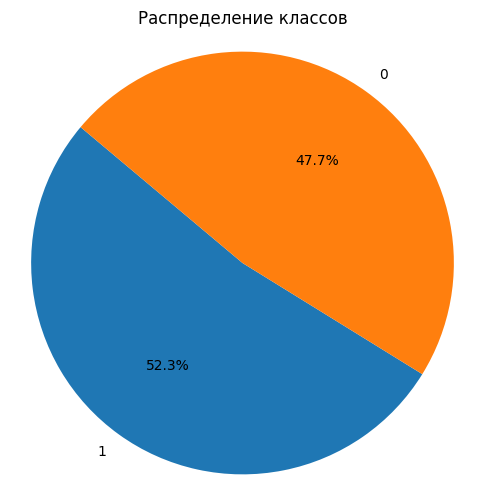

In [6]:
import matplotlib.pyplot as plt

class_counts = data['target'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение классов')
plt.axis('equal')  
plt.show()

### Дисбаланс классов незначителен

In [8]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


## Разделяй и влавствуй 

In [13]:

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.2, random_state=42)

In [14]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


y_pred = nb_classifier.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9342984409799554
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4247
           1       0.93      0.94      0.94      4733

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [10]:
from deep_translator import GoogleTranslator


fake_news_text = data[data['target'] == 1]['text'][0]

translated_text = GoogleTranslator(source='auto', target='ru').translate(fake_news_text)

print(translated_text)


Дональд Трамп просто не мог пожелать всем американцам счастливого Нового года и оставить все как есть. Вместо этого ему пришлось выступить перед своими врагами, ненавистниками и очень нечестными фейковыми новостными СМИ. У бывшей звезды реалити-шоу была всего одна работа, и он не мог ее выполнить. «Поскольку наша страна быстро становится сильнее и умнее, я хочу пожелать всем моим друзьям, сторонникам, врагам, ненавистникам и даже очень нечестным СМИ фейковых новостей счастливого и здорового Нового года», — написал президент Angry Pants в Твиттере. 2018 год будет великим годом для Америки! Поскольку наша страна быстро становится сильнее и умнее, я хочу пожелать всем моим друзьям, сторонникам, врагам, ненавистникам и даже очень нечестным СМИ фейковых новостей счастливого и здорового Нового года. 2018 год будет великим годом для Америки! Дональд Дж. Трамп (@realDonaldTrump) 31 декабря 2017 г. Твит Трампа оказался настолько неприятен, насколько вы и ожидали. Какой президент посылает нового

## Есть на свете волшебные слова...

In [19]:
# Получение индексов наиболее важных слов для каждого класса
fake_class_index = nb_classifier.feature_log_prob_[1].argsort()[::-1]  
real_class_index = nb_classifier.feature_log_prob_[0].argsort()[::-1]  

# Выплюнь! Выплюнь, гадкий шифровщи,к мне эти слова! 
feature_names = tfidf.get_feature_names_out()
n = 10  

top_fake_words = [feature_names[i] for i in fake_class_index[:n]] 
top_real_words = [feature_names[i] for i in real_class_index[:n]]  

print("Топ слов для фейковых новостей:", top_fake_words)
print("Топ слов для настоящих новостей:", top_real_words)


Топ слов для фейковых новостей: ['trump', 'clinton', 'obama', 'people', 'president', 'hillary', 'just', 'said', 'like', 'donald']
Топ слов для настоящих новостей: ['said', 'trump', 'reuters', 'president', 'house', 'state', 'government', 'republican', 'washington', 'united']


## Попытка взять главное триггерное слово

In [15]:
test_text = '''The Department of Justice submitted a court filing on Thanksgiving arguing that a gag order against the former president must remain while pointing to documents filed as part of the $250 million civil fraud trial in New York.
On Thursday, November 23, Cecil Vandevender, an assistant special counsel for the Department of Justice, notified the D.C. Circuit Court of Appeals of a document which said that a gag order needs to be reinstated against Trump during the civil proceedings in New York, where state Attorney General Letitia James has accused the former president of fraudulently inflating the value of his properties in financial statements.
The government's court filings pointed the appeals court to one section in particular, in which an employee at the New York State Unified Court System details the "hundreds of threatening and harassing voicemail messages" which had been sent to Judge Arthur Engoron, who is overseeing the civil trial, as well as the judge's law clerk Allison Greenfield. Engoron fined Trump twice in October for violating his gag order after the former president failed to remove a Truth Social post targeting Greenfield from his website more than two weeks after the judge ordered it be deleted, and then a second time after the former president described Greenfield as a "very partisan" individual to reporters outside the New York courtroom.
The appeals court in D.C. is considering limiting the scope of the gag order imposed by Judge Tanya Chutkan against Trump in the federal election case, which prohibits the former president from attacking prosecutors such as Special Counsel Jack Smith or any potential witness ahead of next year's federal trial.'''


In [16]:
test_text_tfidf = tfidf.transform([test_text])


prediction = nb_classifier.predict(test_text_tfidf)


if prediction[0] == 1:
    print("Это фейковая новость.")
else:
    print("Это настоящая новость.")

Это настоящая новость.


#### Особенности национальной охоты на фейк
Или почему, тестируя языковые модели, вы можете случайно кого-то оскорбить

In [28]:
import requests

api_key = 'СВОБОДНАЯ КАССА! :)'

params = {
    'apiKey': api_key,
    'q': 'trump',
    'language': 'en',
    'pageSize': 20,  # Количество статей для вывода
    'content': 'true'  # Включение полного содержания
}

url = 'https://newsapi.org/v2/everything'

response = requests.get(url, params=params)



if response.status_code == 200:

    news_data = response.json()
    

    articles = news_data['articles']
    texts_to_predict = [article['content'] for article in articles if article['content']]
    

    for text in texts_to_predict:

        test_text_tfidf = tfidf.transform([text])
        

        prediction = nb_classifier.predict(test_text_tfidf)
        if prediction[0] == 1:
            print("Это фейковая новость! ура, товарищи!")
            print()  
            print(text)
            translated_text = GoogleTranslator(source='auto', target='ru').translate(text)
            print(translated_text)
            print()       
        else:
            print("Это настоящая новость.")
            print()
    
else:
    print("Ошибка при запросе")

Это настоящая новость.

Это настоящая новость.

Это настоящая новость.

Это фейковая новость! ура, товарищи!

Maryanne Trump Barry, the eldest sister of ex-President Donald Trump, has died at the age of 86, US media reports.
She was found dead at about 04:00 EST (09:00 GMT) on Monday morning in her New York… [+3352 chars]
Мэриэнн Трамп Бэрри, старшая сестра экс-президента Дональда Трампа, скончалась в возрасте 86 лет, сообщают американские СМИ.
Она была найдена мертвой около 04:00 по восточному стандартному времени (09:00 по Гринвичу) в понедельник утром в своем Нью-Йорке… [+3352 символа]

Это настоящая новость.

Это фейковая новость! ура, товарищи!

Three Ukrainians who aided the Donald Trump campaign's efforts to discredit the Biden family have been charged with treason.
The 2019 drive was led by former New York Mayor Rudy Giuliani, who was Mr… [+3720 chars]
Трем украинцам, которые помогали предвыборному штабу Дональда Трампа дискредитировать семью Байдена, предъявлены обвинения в го

Не тестируйте модель на случайно полученных данных...